### PyTorch DataLoader Exercises

Welcome to the PyTorchDataLoader exercise template notebook.

There are several questions in this notebook and it's your goal to answer them by writing Python and PyTorch code.

> **Note:** There may be more than one solution to each of the exercises, don't worry too much about the *exact* right answer. Try to write some code that works first and then improve it if you can.



Tiny ImageNet already exists at the specified path.
Number of classes: 200
Number of samples (train set): 100000


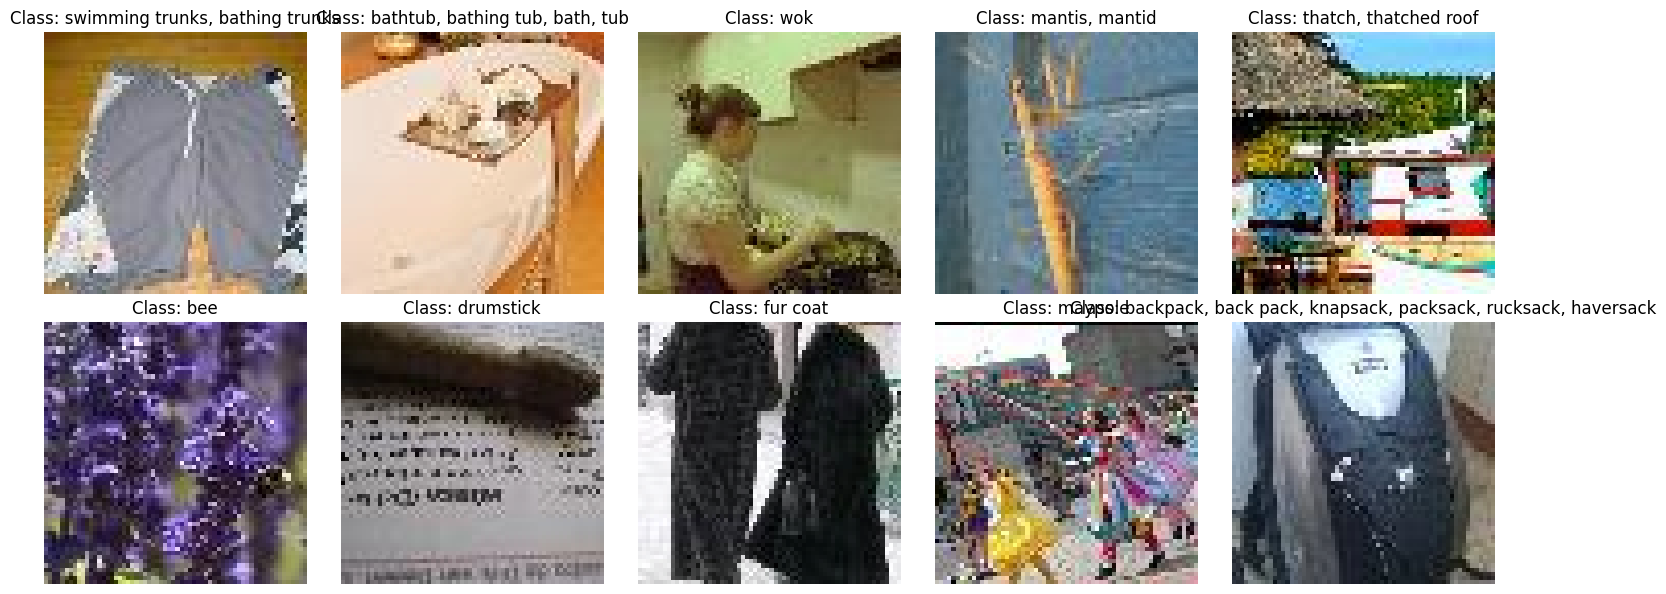

In [ ]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import requests
from zipfile import ZipFile
from io import BytesIO
import numpy as np

##############################################################################
# 1. Download and Extract Tiny ImageNet (comment out if you already have it) #
##############################################################################
dataset_url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
extract_path = '/dataset'  # Destination for extracted files

if not os.path.exists(os.path.join(extract_path, 'tiny-imagenet-200')):
    print("Downloading Tiny ImageNet... (this may take a while)")
    response = requests.get(dataset_url)
    if response.status_code == 200:
        with ZipFile(BytesIO(response.content)) as zip_file:
            zip_file.extractall(extract_path)
        print("Download and extraction complete!")
    else:
        raise RuntimeError("Failed to download dataset.")
else:
    print("Tiny ImageNet already exists at the specified path.")

##############################################################################
# 2. Define transformations and load the dataset                             #
##############################################################################
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_dataset_path = os.path.join(extract_path, 'tiny-imagenet-200', 'train')
test_dataset_path = os.path.join(extract_path, 'tiny-imagenet-200', 'test')

tiny_imagenet_dataset_train = ImageFolder(root=train_dataset_path, transform=transform)
tiny_imagenet_dataset_test = ImageFolder(root=test_dataset_path, transform=transform)

# Create DataLoaders
dataloader_train = DataLoader(tiny_imagenet_dataset_train, batch_size=32, shuffle=True)
dataloader_test = DataLoader(tiny_imagenet_dataset_test, batch_size=32, shuffle=False)

# Determine the number of classes and samples
num_classes = len(tiny_imagenet_dataset_train.classes)
num_samples = len(tiny_imagenet_dataset_train)
print(f'Number of classes: {num_classes}')
print(f'Number of samples (train set): {num_samples}')

##############################################################################
# 3. Build a mapping from WordNet ID (wnid) to human-readable class name     #
##############################################################################
wnid_to_classname = {}
words_txt_path = os.path.join(extract_path, 'tiny-imagenet-200', 'words.txt')

with open(words_txt_path, 'r') as f:
    for line in f:
        wnid, class_name = line.strip().split('\t')
        wnid_to_classname[wnid] = class_name

##############################################################################
# 4. Define a function to denormalize images (for display)                   #
##############################################################################
def denormalize(image):
    """
    Converts a normalized tensor image to a NumPy array
    with pixel values in [0, 1].
    """
    image = image.cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = image * std + mean
    image = np.clip(image, 0, 1)
    return image

##############################################################################
# 5. Visualize 10 images from different classes with readable labels         #
##############################################################################
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
classes_sampled = []
for inputs, labels in dataloader_train:
    for i in range(inputs.size(0)):
        label_index = labels[i].item()
        if label_index not in classes_sampled and len(classes_sampled) < 10:
            classes_sampled.append(label_index)

            # Get the corresponding subplot
            ax = axes.flat[len(classes_sampled) - 1]

            # Denormalize and display the image
            ax.imshow(denormalize(inputs[i]))

            # Convert label index -> wnid -> human-readable class name
            wnid = tiny_imagenet_dataset_train.classes[label_index]
            class_name = wnid_to_classname.get(wnid, wnid)
            ax.set_title(f'Class: {class_name}')
            ax.axis('off')

    if len(classes_sampled) >= 10:
        break

plt.tight_layout()
plt.show()